In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [17]:
def arth_mean(x):
    return np.uint8(np.mean(x,axis=(len(x.shape)-1)))

def harm_mean(x):
    n=x.shape[len(x.shape)-1]
    x=n/np.mean((x+.01)**-1,axis=(len(x.shape)-1))
    return np.uint8(255*x/x.max())

def geom_mean(x):
    n=x.shape[len(x.shape)-1]
    return np.uint8(np.prod(x,axis=(len(x.shape)-1))**(1/n))



def morph_filter(img,function,kernel=np.ones((3,3))):
    # This works by creating multiple shifted copies of the image as a 4D array.  
    # The number of shifted copies is determined by the number of non-zero elements in the kernel
    # Then the function (passed as a handle) is called on the 4th dimension 

    shp=img.shape
    lst=np.argwhere(kernel==1)

    # Padding needed 
    dx=np.uint((kernel.shape[0]-1)/2)
    dy=np.uint((kernel.shape[1]-1)/2)

    img_temp=np.zeros((shp[0],shp[1],shp[2],lst.shape[0]))
    img = cv2.copyMakeBorder(img,dy,dy,dx,dx,cv2.BORDER_REFLECT)

    cnt=0
    xlist=np.int32(np.linspace(0,shp[0]-1,shp[0]))
    ylist=np.int32(np.linspace(0,shp[1]-1,shp[1]))
    for i,j in lst:
        img2=img[i+xlist,:,:]
        img_temp[:,:,:,cnt]=img2[:,j+ylist,:]
        cnt+=1

    return function(img_temp)


def geom_mean_filter(img,kernel=np.ones((3,3))):
    # In this version, we can save time by not making copies of the data and 
    # just doing the operation inside the for loop.  However, this is no longer general for any
    # abitrary function handle.  This works much faster than the other version, 
    # especially as the kernel gets bigger

    shp=img.shape
    lst=np.argwhere(kernel==1)

    # Padding needed 
    dx=np.uint((kernel.shape[0]-1)/2)
    dy=np.uint((kernel.shape[1]-1)/2)
    n=lst.shape[0]
    img_temp=np.ones(shp)
    
    img = cv2.copyMakeBorder(img,dy,dy,dx,dx,cv2.BORDER_REFLECT)
   
    
    xlist=np.int32(np.linspace(0,shp[0]-1,shp[0]))
    ylist=np.int32(np.linspace(0,shp[1]-1,shp[1]))
    for i,j in lst:
        img2=img[i+xlist,:,:]
        img_temp=img_temp*img2[:,j+ylist,:]

    return np.uint8(img_temp**(1/n))
    




Time elapsed  3.669966697692871
Time elapsed  2.439013957977295


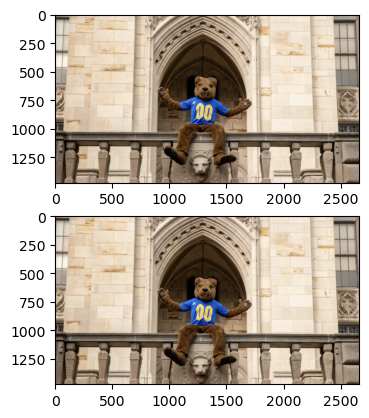

In [18]:
import time

img = cv2.imread(os.path.relpath('../../Data/ROC.png'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

t = time.time()
img2=morph_filter(img,geom_mean,np.ones((3,3)))
print("Time elapsed ",time.time() - t)

t = time.time()
img3=geom_mean_filter(img,kernel=np.ones((3,3)))
print("Time elapsed ",time.time() - t)

plt.subplot(211); plt.imshow(img2) 
plt.subplot(212); plt.imshow(img3)    